<div class="alert-danger">
Red colored boxes mean that the documentation is outdated and needs to be changed/replaced.
</div>

<div class="alert-warning">
Yellow colored boxes mean that the documentation is incomplete and needs to be finished.
</div>

<div class="alert-info">
Blue colored boxes are placeholders for optional additions that would improve and polish the notebook.
</div>

# Table of Contents

<div class="alert-info">
Add a table of contents to make this notebook easy to navigate.
</div>

## Import Necessary Libraries and Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import os
import statistics
import seaborn as sns

from google.colab import files

%matplotlib inline

## Load the Preprocessed Data

In [2]:
uploaded = files.upload()

Saving lin_filtered.csv to lin_filtered.csv


In [8]:
# load preprocessed data file as a pandas dataframe
df = pd.read_csv('lin_filtered.csv', low_memory=False)

In [9]:
df.head()

,Unnamed: 0,25,86,131,294,297,307,321,340,345,346,370,500,506,536,553,608,610,712,718,722,723,726,730,748,758,762,763,812,888,921,923,960,969,970,977,999,1027,1028,1032,...,4804,4809,4813,4814,4816,4817,4821,4822,4824,4844,4845,4881,4886,4901,4933,4944,5052,5065,5066,5075,5113,5122,5163,5164,5189,5201,5214,5251,5262,5275,5282,5283,5330,5331,5369,5377,5387,5407,activity,nametags
0,0,-0.031,-0.024,-0.021,-4.109,0.003,-0.103000,2.551,3.024,-0.442,-0.001,1.038,0.048,-0.019,0.033,0.040000,-0.180,-0.918,-0.459,0.039,-1.460,1.732,0.160,-0.093,0.225,-0.394,-0.560,-0.104,0.545727,0.011,-0.031,-0.010,2.869,-0.040,0.075,0.015,0.207,-0.00504,-16.502,0.026,...,-14.342,-1.213727,0.033067,-2.246,24.298,48.519,0.120300,0.582294,0.227375,0.005,0.020,-0.005,-0.060,-0.049,-0.034,-0.004000,0.025,-0.034,-0.014,-0.021,0.004,-0.008,0.041,0.044,0.043,-0.037,-0.039,0.016,-0.029,0.050,0.030,-0.028,-0.033,0.046,0.058,-0.087,0.035,-0.007,False,a119e_l125p
1,1,-0.019,0.006,-0.038,-4.111,0.006,-0.054667,-0.002,2.952,-0.366,0.009,0.992,0.001,-0.002,0.031,0.016286,0.078,-0.023,-0.416,0.066,-1.446,1.768,0.026,0.005,-0.004,-1.017,-0.096,-0.089,0.775091,-0.003,-0.023,-0.030,2.896,0.013,0.093,0.124,2.650,0.25640,-16.527,0.008,...,4.115,-0.619045,-1.028600,-1.808,21.268,62.454,-0.112233,0.537647,0.278125,-0.012,0.007,-0.003,-0.082,-0.029,-0.017,0.010000,0.005,-0.021,-0.021,-0.009,-0.009,-0.001,0.022,0.022,0.026,-0.012,-0.020,0.013,-0.012,0.034,0.005,-0.018,-0.016,0.021,0.047,-0.035,0.011,0.005,False,a119e_r283k_a353v
2,2,-0.036,-0.056,-0.033,-4.107,-0.012,-0.099333,-0.002,3.031,-0.089,-0.019,1.051,0.041,-0.024,0.042,-1.114571,-0.216,-0.933,-0.457,0.048,-1.455,1.739,-2.953,-0.062,0.222,-1.010,-0.205,-0.103,0.535364,-0.005,-0.025,-0.020,2.862,-0.048,0.058,0.002,0.200,-0.00790,-16.508,0.018,...,-11.706,0.489000,-0.503633,-2.324,24.274,49.118,0.648200,0.396000,0.027750,0.012,0.010,-0.009,-0.070,-0.055,-0.027,-0.002000,0.042,-0.029,-0.015,-0.020,0.003,-0.011,0.030,0.051,0.043,-0.034,-0.045,0.018,-0.032,0.053,0.028,-0.033,-0.038,0.044,0.074,-0.076,0.036,-0.018,False,c135y
3,3,-0.058,-0.116,-0.039,-4.106,-0.038,-0.134333,-0.017,-0.033,-0.056,-0.046,1.180,4.554,4.426,0.063,-1.086357,-0.536,-1.128,-0.476,0.024,-1.473,1.782,-2.943,-0.033,0.217,-1.035,-0.533,-0.105,0.755273,-0.045,-0.063,-0.083,2.880,-0.088,-0.060,-0.046,0.201,0.22802,-16.508,0.018,...,-23.103,-1.607500,0.218600,-2.305,16.750,56.411,0.537033,0.455118,0.050625,0.028,-0.003,-0.021,-0.103,-0.082,-0.065,-0.492000,0.038,-0.042,0.003,-0.026,0.021,-0.001,0.031,0.062,0.057,-0.048,-0.067,0.189,-0.069,0.076,0.053,-0.050,-0.061,0.061,0.126,-0.124,0.059,-0.049,False,c135y_e285m
4,4,-0.011,0.012,-0.037,-4.110,0.011,-0.057333,0.000,2.974,-0.362,0.017,0.949,0.010,0.005,0.025,0.008214,-0.055,-0.927,-0.409,0.080,-1.434,1.805,0.036,-0.004,-0.004,-1.108,-0.128,-0.098,0.782091,0.005,-0.054,-0.030,2.896,-0.004,-2.720,-2.106,0.149,0.25992,0.000,0.008,...,2.702,-1.240091,-1.339100,-2.378,20.821,61.475,-2.289233,0.309824,-0.122750,-0.014,0.012,0.007,-0.030,-0.027,-0.011,-0.371001,0.004,-0.017,-0.019,-0.007,-0.011,0.018,0.018,0.023,0.022,-0.007,-0.014,0.148,-0.012,0.024,0.005,-0.013,-0.008,0.016,0.024,-0.035,0.009,0.013,False,c135y_e285v


In [12]:
df.columns

Index(['Unnamed: 0', '25', '86', '131', '294', '297', '307', '321', '340',
       '345',
       ...
       '5282', '5283', '5330', '5331', '5369', '5377', '5387', '5407',
       'activity', 'nametags'],
      dtype='object', length=345)

In [13]:
df.drop(columns='Unnamed: 0', inplace=True)

In [14]:
df.head()

,25,86,131,294,297,307,321,340,345,346,370,500,506,536,553,608,610,712,718,722,723,726,730,748,758,762,763,812,888,921,923,960,969,970,977,999,1027,1028,1032,1035,...,4804,4809,4813,4814,4816,4817,4821,4822,4824,4844,4845,4881,4886,4901,4933,4944,5052,5065,5066,5075,5113,5122,5163,5164,5189,5201,5214,5251,5262,5275,5282,5283,5330,5331,5369,5377,5387,5407,activity,nametags
0,-0.031,-0.024,-0.021,-4.109,0.003,-0.103000,2.551,3.024,-0.442,-0.001,1.038,0.048,-0.019,0.033,0.040000,-0.180,-0.918,-0.459,0.039,-1.460,1.732,0.160,-0.093,0.225,-0.394,-0.560,-0.104,0.545727,0.011,-0.031,-0.010,2.869,-0.040,0.075,0.015,0.207,-0.00504,-16.502,0.026,0.012,...,-14.342,-1.213727,0.033067,-2.246,24.298,48.519,0.120300,0.582294,0.227375,0.005,0.020,-0.005,-0.060,-0.049,-0.034,-0.004000,0.025,-0.034,-0.014,-0.021,0.004,-0.008,0.041,0.044,0.043,-0.037,-0.039,0.016,-0.029,0.050,0.030,-0.028,-0.033,0.046,0.058,-0.087,0.035,-0.007,False,a119e_l125p
1,-0.019,0.006,-0.038,-4.111,0.006,-0.054667,-0.002,2.952,-0.366,0.009,0.992,0.001,-0.002,0.031,0.016286,0.078,-0.023,-0.416,0.066,-1.446,1.768,0.026,0.005,-0.004,-1.017,-0.096,-0.089,0.775091,-0.003,-0.023,-0.030,2.896,0.013,0.093,0.124,2.650,0.25640,-16.527,0.008,0.000,...,4.115,-0.619045,-1.028600,-1.808,21.268,62.454,-0.112233,0.537647,0.278125,-0.012,0.007,-0.003,-0.082,-0.029,-0.017,0.010000,0.005,-0.021,-0.021,-0.009,-0.009,-0.001,0.022,0.022,0.026,-0.012,-0.020,0.013,-0.012,0.034,0.005,-0.018,-0.016,0.021,0.047,-0.035,0.011,0.005,False,a119e_r283k_a353v
2,-0.036,-0.056,-0.033,-4.107,-0.012,-0.099333,-0.002,3.031,-0.089,-0.019,1.051,0.041,-0.024,0.042,-1.114571,-0.216,-0.933,-0.457,0.048,-1.455,1.739,-2.953,-0.062,0.222,-1.010,-0.205,-0.103,0.535364,-0.005,-0.025,-0.020,2.862,-0.048,0.058,0.002,0.200,-0.00790,-16.508,0.018,0.007,...,-11.706,0.489000,-0.503633,-2.324,24.274,49.118,0.648200,0.396000,0.027750,0.012,0.010,-0.009,-0.070,-0.055,-0.027,-0.002000,0.042,-0.029,-0.015,-0.020,0.003,-0.011,0.030,0.051,0.043,-0.034,-0.045,0.018,-0.032,0.053,0.028,-0.033,-0.038,0.044,0.074,-0.076,0.036,-0.018,False,c135y
3,-0.058,-0.116,-0.039,-4.106,-0.038,-0.134333,-0.017,-0.033,-0.056,-0.046,1.180,4.554,4.426,0.063,-1.086357,-0.536,-1.128,-0.476,0.024,-1.473,1.782,-2.943,-0.033,0.217,-1.035,-0.533,-0.105,0.755273,-0.045,-0.063,-0.083,2.880,-0.088,-0.060,-0.046,0.201,0.22802,-16.508,0.018,0.003,...,-23.103,-1.607500,0.218600,-2.305,16.750,56.411,0.537033,0.455118,0.050625,0.028,-0.003,-0.021,-0.103,-0.082,-0.065,-0.492000,0.038,-0.042,0.003,-0.026,0.021,-0.001,0.031,0.062,0.057,-0.048,-0.067,0.189,-0.069,0.076,0.053,-0.050,-0.061,0.061,0.126,-0.124,0.059,-0.049,False,c135y_e285m
4,-0.011,0.012,-0.037,-4.110,0.011,-0.057333,0.000,2.974,-0.362,0.017,0.949,0.010,0.005,0.025,0.008214,-0.055,-0.927,-0.409,0.080,-1.434,1.805,0.036,-0.004,-0.004,-1.108,-0.128,-0.098,0.782091,0.005,-0.054,-0.030,2.896,-0.004,-2.720,-2.106,0.149,0.25992,0.000,0.008,0.003,...,2.702,-1.240091,-1.339100,-2.378,20.821,61.475,-2.289233,0.309824,-0.122750,-0.014,0.012,0.007,-0.030,-0.027,-0.011,-0.371001,0.004,-0.017,-0.019,-0.007,-0.011,0.018,0.018,0.023,0.022,-0.007,-0.014,0.148,-0.012,0.024,0.005,-0.013,-0.008,0.016,0.024,-0.035,0.009,0.013,False,c135y_e285v


#### Correlation Heatmap for All Features

In [ ]:
#plt.figure(figsize=(20, 20))
#heatmap = sns.heatmap(df.corr(), annot=True)
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

#### Pop Out Nametags Column

In [15]:
nametags = df.pop('nametags').astype(str)
print(nametags)

0              a119e_l125p
1        a119e_r283k_a353v
2                    c135y
3              c135y_e285m
4              c135y_e285v
               ...        
16586    y220c_t230c_n239y
16587    y220c_y234f_n239l
16588                y234c
16589          y234c_a119e
16590          y234f_n239l
Name: nametags, Length: 16591, dtype: object


In [16]:
df.head()

,25,86,131,294,297,307,321,340,345,346,370,500,506,536,553,608,610,712,718,722,723,726,730,748,758,762,763,812,888,921,923,960,969,970,977,999,1027,1028,1032,1035,...,4802,4804,4809,4813,4814,4816,4817,4821,4822,4824,4844,4845,4881,4886,4901,4933,4944,5052,5065,5066,5075,5113,5122,5163,5164,5189,5201,5214,5251,5262,5275,5282,5283,5330,5331,5369,5377,5387,5407,activity
0,-0.031,-0.024,-0.021,-4.109,0.003,-0.103000,2.551,3.024,-0.442,-0.001,1.038,0.048,-0.019,0.033,0.040000,-0.180,-0.918,-0.459,0.039,-1.460,1.732,0.160,-0.093,0.225,-0.394,-0.560,-0.104,0.545727,0.011,-0.031,-0.010,2.869,-0.040,0.075,0.015,0.207,-0.00504,-16.502,0.026,0.012,...,-18.015,-14.342,-1.213727,0.033067,-2.246,24.298,48.519,0.120300,0.582294,0.227375,0.005,0.020,-0.005,-0.060,-0.049,-0.034,-0.004000,0.025,-0.034,-0.014,-0.021,0.004,-0.008,0.041,0.044,0.043,-0.037,-0.039,0.016,-0.029,0.050,0.030,-0.028,-0.033,0.046,0.058,-0.087,0.035,-0.007,False
1,-0.019,0.006,-0.038,-4.111,0.006,-0.054667,-0.002,2.952,-0.366,0.009,0.992,0.001,-0.002,0.031,0.016286,0.078,-0.023,-0.416,0.066,-1.446,1.768,0.026,0.005,-0.004,-1.017,-0.096,-0.089,0.775091,-0.003,-0.023,-0.030,2.896,0.013,0.093,0.124,2.650,0.25640,-16.527,0.008,0.000,...,-9.978,4.115,-0.619045,-1.028600,-1.808,21.268,62.454,-0.112233,0.537647,0.278125,-0.012,0.007,-0.003,-0.082,-0.029,-0.017,0.010000,0.005,-0.021,-0.021,-0.009,-0.009,-0.001,0.022,0.022,0.026,-0.012,-0.020,0.013,-0.012,0.034,0.005,-0.018,-0.016,0.021,0.047,-0.035,0.011,0.005,False
2,-0.036,-0.056,-0.033,-4.107,-0.012,-0.099333,-0.002,3.031,-0.089,-0.019,1.051,0.041,-0.024,0.042,-1.114571,-0.216,-0.933,-0.457,0.048,-1.455,1.739,-2.953,-0.062,0.222,-1.010,-0.205,-0.103,0.535364,-0.005,-0.025,-0.020,2.862,-0.048,0.058,0.002,0.200,-0.00790,-16.508,0.018,0.007,...,-17.386,-11.706,0.489000,-0.503633,-2.324,24.274,49.118,0.648200,0.396000,0.027750,0.012,0.010,-0.009,-0.070,-0.055,-0.027,-0.002000,0.042,-0.029,-0.015,-0.020,0.003,-0.011,0.030,0.051,0.043,-0.034,-0.045,0.018,-0.032,0.053,0.028,-0.033,-0.038,0.044,0.074,-0.076,0.036,-0.018,False
3,-0.058,-0.116,-0.039,-4.106,-0.038,-0.134333,-0.017,-0.033,-0.056,-0.046,1.180,4.554,4.426,0.063,-1.086357,-0.536,-1.128,-0.476,0.024,-1.473,1.782,-2.943,-0.033,0.217,-1.035,-0.533,-0.105,0.755273,-0.045,-0.063,-0.083,2.880,-0.088,-0.060,-0.046,0.201,0.22802,-16.508,0.018,0.003,...,-23.006,-23.103,-1.607500,0.218600,-2.305,16.750,56.411,0.537033,0.455118,0.050625,0.028,-0.003,-0.021,-0.103,-0.082,-0.065,-0.492000,0.038,-0.042,0.003,-0.026,0.021,-0.001,0.031,0.062,0.057,-0.048,-0.067,0.189,-0.069,0.076,0.053,-0.050,-0.061,0.061,0.126,-0.124,0.059,-0.049,False
4,-0.011,0.012,-0.037,-4.110,0.011,-0.057333,0.000,2.974,-0.362,0.017,0.949,0.010,0.005,0.025,0.008214,-0.055,-0.927,-0.409,0.080,-1.434,1.805,0.036,-0.004,-0.004,-1.108,-0.128,-0.098,0.782091,0.005,-0.054,-0.030,2.896,-0.004,-2.720,-2.106,0.149,0.25992,0.000,0.008,0.003,...,-9.191,2.702,-1.240091,-1.339100,-2.378,20.821,61.475,-2.289233,0.309824,-0.122750,-0.014,0.012,0.007,-0.030,-0.027,-0.011,-0.371001,0.004,-0.017,-0.019,-0.007,-0.011,0.018,0.018,0.023,0.022,-0.007,-0.014,0.148,-0.012,0.024,0.005,-0.013,-0.008,0.016,0.024,-0.035,0.009,0.013,False


# Model 1: Random Forest

The first classification model that I'll be using is a Random Forest Classifier with two different methods of hyperparameter optimization: RandomSearch and Bayesian Optimization.

In [17]:
# import from sklearn
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

### Create Train/Test Split

In [18]:
from sklearn.model_selection import train_test_split

# dont forget to define your X and y
X = df.iloc[:, 0:341] # features
y = df.activity # target variable

feature_list = list(X.columns) # save feature names for later

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=420)

### Scale Data to Prepare for Model Creation

In [19]:
from sklearn.preprocessing import MaxAbsScaler

# build scaler based on training data and apply it to test data to then also scale the test data
scaler = MaxAbsScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Train and Fit the RandomForestClassifier Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 500, random_state=420, n_jobs=-1)

model1 = clf.fit(X_train_scaled, y_train)
y_pred = model1.predict(X_test_scaled)
y_pred_prob = model1.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.994
Random Forest: f1-score=0.991


The Random Forest classifier model shows an overall accuracy of 99.4% and an F1-score of 0.991 - both of which look very good, but are misleading! 

My guess is that this model has a high accuracy score due to overfitting. Random Forest Classifiers have a tendency to overfit, especially when there is a large number of trees (n_estimators). For this reason, I will use two different methods for hyperparameter optimization - RandomizedSearchCV and Bayesian Optimization - to train Random Forest Classifiers and then compare the results with this baseline model. In the next section, I will take a closer look at the model's performance.

### Evaluate Model Performance

To evaluate my Random Forest Classifier, I will be visualizing the model's performance using a confusion matrix, and then use the classification report to view the precision, recall, and f1-scores for each category. The confusion matrix will give me an overall idea of the model's performance, while the classification report will help me understand my model's performance in a more nuanced way.

In [21]:
conf = confusion_matrix(y_test, y_pred).astype('float')

In [22]:
conf = conf / conf.sum(axis=1)[:, np.newaxis]

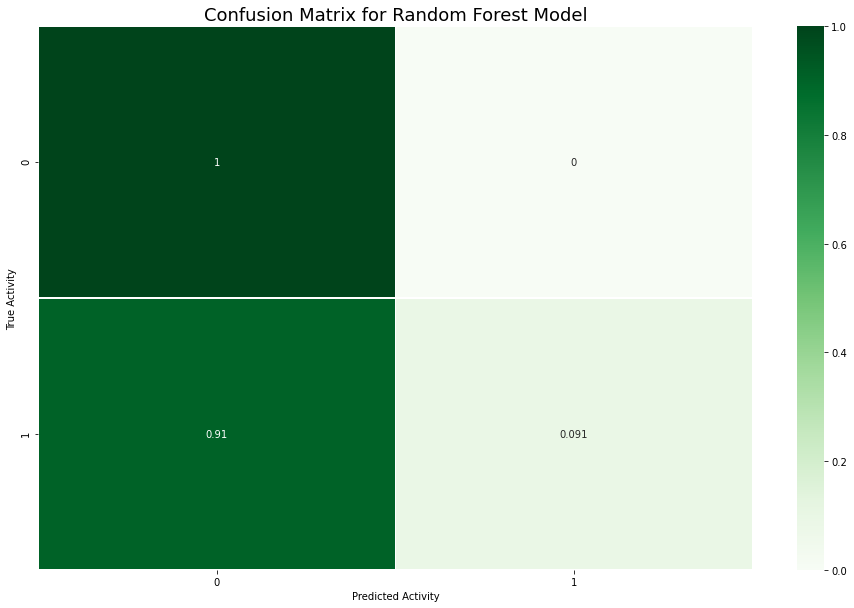

In [23]:
#plot confusion matrix
plt.figure(figsize=(16, 10))
sns.heatmap(conf, annot=True, annot_kws={'size':10}, cmap=plt.cm.Greens, linewidths=0.2)
sns.set(font_scale=1.5)

_ = plt.xlabel('Predicted Activity')
_ = plt.ylabel('True Activity')
_ = plt.title('Confusion Matrix for Random Forest Model')
plt.show()

The 0's correspond to **inactive p53 proteins**, and the 1's correspond to **active p53 proteins**.

This confusion matrix shows that my classifier had trouble correctly classifying the active p53 proteins as active, as seen by the large proportion of false negatives. On the other hand, my classifier did very well at correctly labeling *inactive* p53 proteins. This makes sense, as the data is very imbalanced with regards to inactive vs active protein data. There is much more data for inactive proteins in the dataset than for active proteins. I saw this imbalance in the data during the exploratory data analysis that was performed earlier. 

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00      3297
        True       1.00      0.09      0.17        22

    accuracy                           0.99      3319
   macro avg       1.00      0.55      0.58      3319
weighted avg       0.99      0.99      0.99      3319



The imbalance in the data is further confirmed by the low recall and low f1-scores for the "True" (aka "Active" p53) category. This is due to the low amount of "True" observations within the dataset, which does not allow the classifier enough data to learn how to predict the "True" class. This is a common problem with classifiers made with imbalanced data. 

To address this problem, I will oversample my minority class by generating synthetic data (SMOTE), which will create a more balanced dataset for my classifier model to learn from. I will also be combining this method with the Tomek Links undersampling method, which will create a clearer decision boundary for my binary classifier.

Before I move on, however, I am going to visualize the top 10 feature importances from this Random Forest classifier, so that I can compare these results with those of following models:

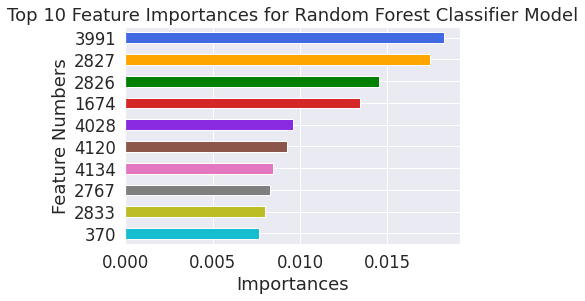

In [25]:
feature_importances = pd.Series(model1.feature_importances_, index=feature_list)
_ = feature_importances.nlargest(10).plot(kind='barh', color=['royalblue', 'orange', 'green', 'tab:red', 'blueviolet', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']).invert_yaxis()

_ = plt.ylabel('Feature Numbers')
_ = plt.xlabel('Importances')
_ = plt.title('Top 10 Feature Importances for Random Forest Classifier Model')
plt.show()

Looks like the **most importance features** for this Random Forest Classifier model are: **3991, 2827, 2826, 1674, 4028, 4120, 4134, 2767, 2833, and 370**.

All of the Top 10 Most Important Features are **Electrostatic and Surface-Based Features**! This is very interesting, because I would have thought that the Distance-Based Features would be more important for indicating wild-type p53 function. However, this feature list is not reliable due to the extremely low recall for the positive class. Thus, I will be comparing these Top Features with those of following models after resampling the data and hyperparameter tuning my model algorithms.

# Model 2: Random Forest with Oversampling/Undersampling and Randomized Search

## Balance the Imbalanced Classes with SMOTETomek

SMOTE is an oversampling method that interpolates synthetic observations between the existing ones in the dataset. Tomek Links are pairs of nearest neighbors that have different classes, which in this case, are instances of the majority and minority class that are next to each other. Tomek Links are used for undersampling the majority class by getting rid of those observations which are next to the minority class examples, thus creating a more distinct decision boundary for the classifier.

SMOTETomek is a combined method that oversamples the minority class and undersamples the majority class. This method is preferable to using SMOTE by itself since it cleans up the noise that SMOTE tends to create in the sample space.

In [ ]:
# import imblearn libraries for SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [ ]:
# define the resampler, smt
# oversample minority class, undersample majority class
smt = SMOTETomek(random_state=420, smote=SMOTE(sampling_strategy='minority'), tomek=TomekLinks(sampling_strategy='majority'), n_jobs=-1)

# resample the training dataset
X_res, y_res = smt.fit_resample(X_train_scaled, y_train) # only for training data!!

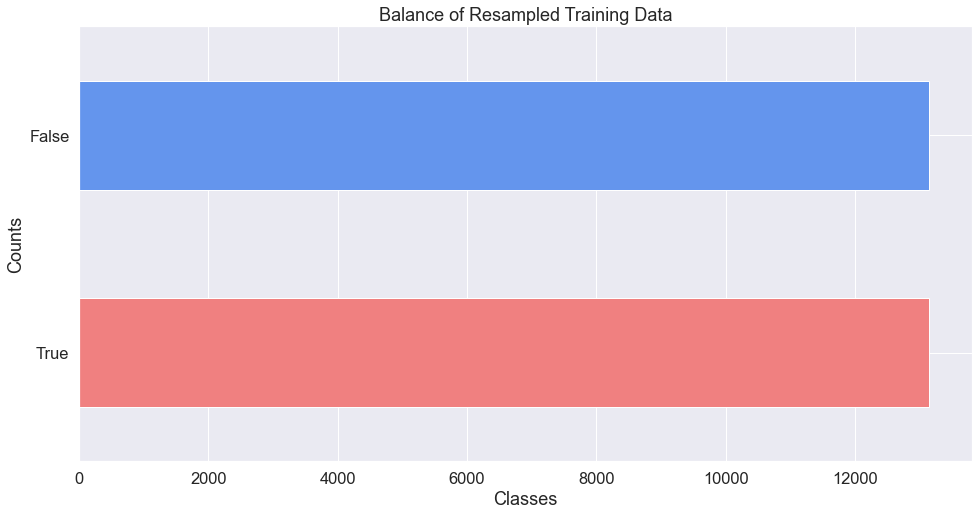

In [ ]:
# visualize the two classes with a barchart to confirm balance
plt.figure(figsize=(16, 8))

_ = y_res.value_counts().plot(kind='barh', color=['lightcoral', 'cornflowerblue'])
_ = plt.xlabel('Classes')
_ = plt.ylabel('Counts')
_ = plt.title('Balance of Resampled Training Data')

plt.show()

<div class="alert-warning">
Question: Should I perform the resampling on the whole dataset and train models on that or should I only resample the training set?
</div>

<div class="alert-warning">
The results of the resampling are ______
</div>

In [ ]:
# run a baseline Random Forest model with the resampled data and call it model2

model2 = clf.fit(X_res, y_res) # use X_res and y_res instead of X_train_scaled and y_train
y_pred = model2.predict(X_test_scaled)
y_pred_prob = model2.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
print(f1)

0.9928497033155376


In [ ]:
# classification report for model 2
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3297
        True       0.60      0.27      0.37        22

    accuracy                           0.99      3319
   macro avg       0.80      0.64      0.69      3319
weighted avg       0.99      0.99      0.99      3319



<div class="alert-warning">
[Interpret the classification report results for model2 here]
</div>

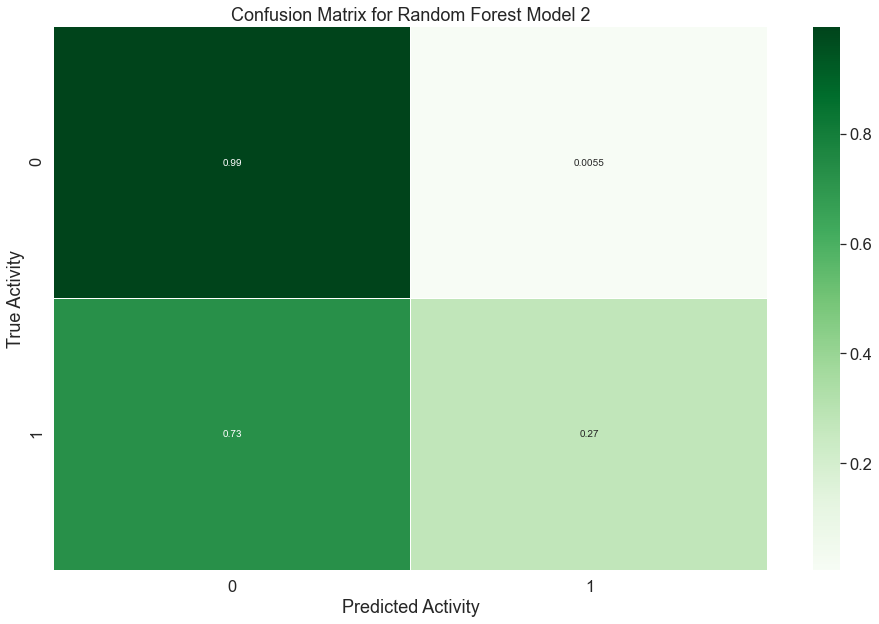

In [ ]:
# plot confusion matrix for model 2
conf2 = confusion_matrix(y_test, y_pred).astype('float')
conf2 = conf2 / conf2.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16, 10))
sns.heatmap(conf2, annot=True, annot_kws={'size':10}, cmap=plt.cm.Greens, linewidths=0.2)
sns.set(font_scale=1.5)

_ = plt.xlabel('Predicted Activity')
_ = plt.ylabel('True Activity')
_ = plt.title('Confusion Matrix for Random Forest Model 2')
plt.show()

### Increase Weights on the Minority Class

In [ ]:
# add class weights in favor of the minority (False/Inactive) class and run Random Forest model
# model3, clf2

clf2 = RandomForestClassifier(n_estimators = 500, class_weight={0:1, 1:10}, random_state=420, n_jobs=-1)


model3 = clf2.fit(X_res, y_res) # use X_res and y_res instead of X_train_scaled and y_train
y_pred = model3.predict(X_test_scaled)
y_pred_prob = model3.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
# classification report for model 3
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.99      0.99      3297
        True       0.25      0.27      0.26        22

    accuracy                           0.99      3319
   macro avg       0.62      0.63      0.63      3319
weighted avg       0.99      0.99      0.99      3319



<div class="alert-warning">
[Interpret the classification report results for model 3 here]
</div>

## Hyperparameter Tuning with Randomized Search

Let's start by taking a look at the parameters used by the previous Random Forest model:

In [ ]:
print('Current Random Forest Parameters:\n ', clf.get_params())

Current Random Forest Parameters:
  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'oob_score': False, 'random_state': 420, 'verbose': 0, 'warm_start': False}


<div class="alert-danger">

Out of these parameters, I will be focusing on the tuning the following:

+ class_weight: class weights affect how the model is penalized for misclassifying examples of each class
+ max_depth: max levels for each individual decision tree
+ max_features: max number of features considered when splitting a node
+ min_samples_split: minimum number of samples required to split a node
+ min_samples_leaf: minimum number of samples required at each leaf
    
</div>

<div class="alert-warning">
I will also be testing both 'gini' and 'entropy' for the node splitting criteria.
</div>

<div class="alert-warning">
I will not be tuning the n_estimators or max_depth parameters using Randomized Search.

</div>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# class_weight
class_weights = [{0:1, 1:2}, {0:1, 1:5}, {0:1, 1:10}]

# max_features
max_features=['auto', 'sqrt']
max_features.append(None)

# min_samples_split
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]

# min_samples_leaf
min_samples_leaf = [int(x) for x in np.linspace(1, 20, 5)]

In [ ]:
# create the random parameter grid
random_grid = {'class_weight': class_weights,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# create a RandomForestClassifier to tune
clf = RandomForestClassifier(n_estimators = 500, random_state=420, n_jobs=-1)

# create random search model
model4 = RandomizedSearchCV(estimator=clf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=420, n_jobs=-1)

# fit random search model on resampled data
model4.fit(X_res, y_res)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
# view best hyperparameters from fitting the random search
print(model4.best_params_)

<div class="alert-danger">
The best parameters from the Randomized Search were:

{'n_estimators': 673, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}

To deal with the imbalance in the dataset, I will also be adding the class_weights parameter to the Random Forest Classifier and assigning more weights to the "active" class.
</div>

# Model 3: Random Forest with Bayesian Optimization